Logistic model for outcome of fight

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('../df_ufc_masters_w_reversed.csv')
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,Winner_Blue,Winner_Red,better_rank_Blue,better_rank_Red,better_rank_neither
0,Thiago Santos,Johnny Walker,0.600000,0.434783,66.666667,130.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Alex Oliveira,Niko Price,0.370370,0.666667,170.000000,50.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Misha Cirkunov,Krzysztof Jotko,0.476190,0.565217,110.000000,76.923077,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Alexander Hernandez,Mike Breeden,0.870968,0.173913,14.814815,475.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Joe Solecki,Jared Gordon,0.574468,0.465116,74.074074,115.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,Darren Elkins,Duane Ludwig,0.425532,0.607843,135.000000,64.516129,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9784,Daniel Roberts,John Howard,0.363636,0.677419,175.000000,47.619048,21-03-2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9785,Chase Gormley,Brendan Schaub,0.312500,0.722222,220.000000,38.461538,21-03-2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9786,Julio Paulino,Mike Pierce,0.229885,0.807692,335.000000,23.809524,21-03-2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [73]:
df.filter(regex='^B')

,B_fighter,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,...,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,B_match_weightclass_rank,B_Pound-for-Pound_rank,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
0,Johnny Walker,0.434783,130.000000,0,1,0,3.420000,0.590000,0.700000,0.240000,...,198.12,208.28,205,29,10.0,NaN,0.0,1.0,0.0,0.0
1,Niko Price,0.666667,50.000000,2,0,0,5.160000,0.420000,0.800000,0.790000,...,182.88,193.04,170,32,NaN,NaN,0.0,1.0,0.0,0.0
2,Krzysztof Jotko,0.565217,76.923077,1,0,0,2.920000,0.410000,0.100000,1.150000,...,185.42,195.58,185,32,NaN,NaN,0.0,0.0,1.0,0.0
3,Mike Breeden,0.173913,475.000000,1,0,0,4.040000,0.340000,0.000000,0.000000,...,177.80,177.80,155,32,NaN,NaN,0.0,1.0,0.0,0.0
4,Jared Gordon,0.465116,115.000000,0,2,0,5.220000,0.560000,0.000000,2.540000,...,175.26,172.72,145,33,NaN,NaN,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,Duane Ludwig,0.607843,64.516129,1,0,0,13.666667,0.576667,0.000000,0.000000,...,177.80,177.80,170,31,NaN,NaN,0.0,1.0,0.0,0.0
9784,John Howard,0.677419,47.619048,0,3,0,18.000000,0.550000,1.000000,4.666667,...,170.18,180.34,170,27,NaN,NaN,0.0,1.0,0.0,0.0
9785,Brendan Schaub,0.722222,38.461538,1,0,0,12.000000,0.250000,0.000000,0.000000,...,193.04,198.12,245,27,NaN,NaN,0.0,1.0,0.0,0.0
9786,Mike Pierce,0.807692,23.809524,1,0,0,40.500000,0.405000,0.000000,3.500000,...,172.72,177.80,170,29,NaN,NaN,0.0,1.0,0.0,0.0


array([[<Axes: title={'center': 'B_Height_cms'}>,
        <Axes: title={'center': 'B_Reach_cms'}>],
       [<Axes: title={'center': 'B_age'}>,
        <Axes: title={'center': 'B_current_lose_streak'}>],
       [<Axes: title={'center': 'B_current_win_streak'}>, <Axes: >]],
      dtype=object)

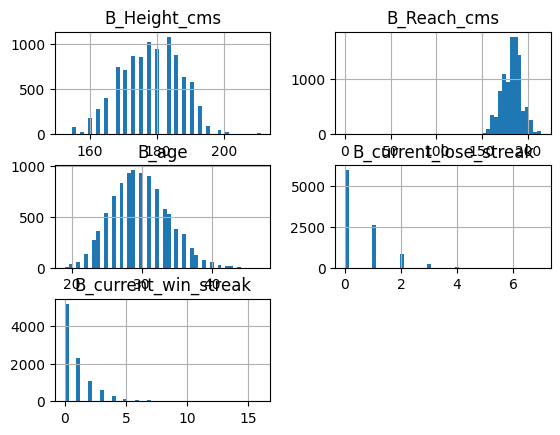

In [74]:
columns = ['B_Height_cms', 'B_Reach_cms', 'B_age', 'B_current_lose_streak', 'B_current_win_streak']
df[columns].hist(bins=50)

In [75]:
features_min_max_sc = ['B_Height_cms', 'B_Reach_cms', 'B_age', 'R_Height_cms', 'R_Reach_cms', 'R_age']

minmax_sc = MinMaxScaler()
minmax_sc.fit(df[features_min_max_sc])
df[['B_Height_mm', 'B_Reach_mm', 'B_age_mm', 'R_Height_mm', 'R_Reach_mm', 'R_age_mm']] = minmax_sc.transform(df[features_min_max_sc])

array([[<Axes: title={'center': 'B_Height_mm'}>,
        <Axes: title={'center': 'B_Reach_mm'}>],
       [<Axes: title={'center': 'B_age_mm'}>, <Axes: >]], dtype=object)

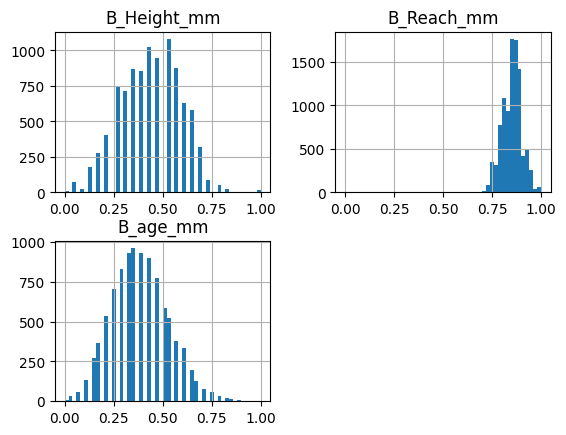

In [76]:
columns = ['B_Height_mm', 'B_Reach_mm', 'B_age_mm']
df[columns].hist(bins=50)

In [77]:
features_names = ['B_Height_mm', 'B_Reach_mm', 'B_age_mm', 'B_current_lose_streak', 'B_current_win_streak',
                  'R_Height_mm', 'R_Reach_mm', 'R_age_mm', 'R_current_lose_streak', 'R_current_win_streak',
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct']

#numpy arrays
#X = np.c_[df[features_names]]
#y = np.c_[df['Winner']]

In [78]:
X =df[features_names]
y= df['Winner']

In [79]:
y_encoded = y.apply(lambda x: 1 if x == 'Red' else 0)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

In [81]:
model_lin = LogisticRegression()
model_lin.fit(X_train, y_train)

C:\Users\AleksanderHalfstadAa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred_proba= model_lin.predict_proba(X_test)

In [83]:
y_pred_percent = y_pred_proba * 100
y_pred_percent[:5]

array([[47.56653741, 52.43346259],
       [29.82840539, 70.17159461],
       [55.05995347, 44.94004653],
       [43.77769809, 56.22230191],
       [45.11397265, 54.88602735]])

In [84]:
y_pred_train = model_lin.predict(X_train)
y_pred_test = model_lin.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.59
Confusion Matrix:
 [[572 418]
 [387 581]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       990
           1       0.58      0.60      0.59       968

    accuracy                           0.59      1958
   macro avg       0.59      0.59      0.59      1958
weighted avg       0.59      0.59      0.59      1958



Train accuracy: 0.5872286079182631
Train precsision: 0.5871859296482412
Train recall: 0.5952623535404993


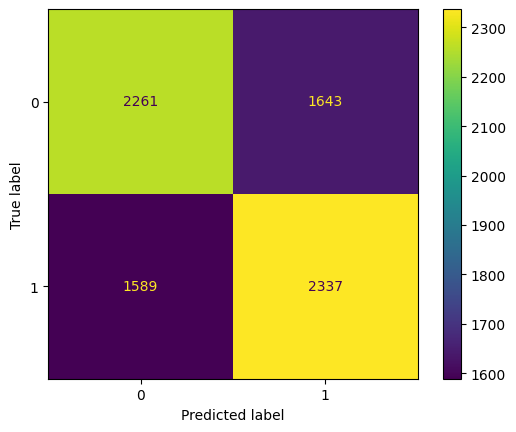

In [86]:
acc_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_train).plot()
tn = cm_train[0,0]
fp = cm_train[0,1]
fn = cm_train[1,0]
tp = cm_train[1,1]
precision = tp/(fp+tp)
recall = tp/(tp+fn)

print(f'Train accuracy: {acc_train}')
print(f'Train precsision: {precision}')
print(f'Train recall: {recall}')

Test accuracy: 0.5888661899897855
Test precsision: 0.5815815815815816
Test recall: 0.6002066115702479


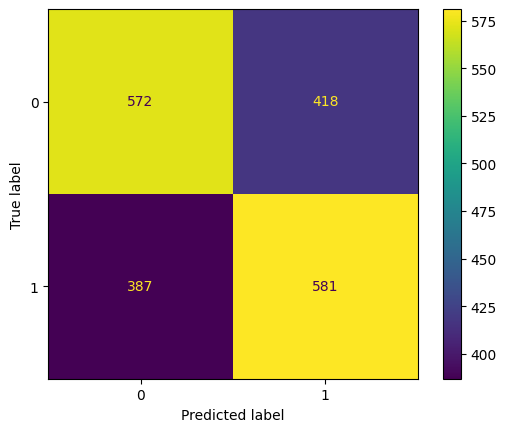

In [87]:
acc_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()
tn = cm_test[0,0]
fp = cm_test[0,1]
fn = cm_test[1,0]
tp = cm_test[1,1]
precision_test = tp/(fp+tp)
recall_test = tp/(tp+fn)

print(f'Test accuracy: {acc_test}')
print(f'Test precsision: {precision_test}')
print(f'Test recall: {recall_test}')